# Aim: Data Analysis For Logistic Regression

In [1]:
# Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
# import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys
import os
import math
import csv
import json

In [4]:
os.getcwd()

'C:\\D Drive\\University of Washington\\Study\\Quarter 2\\DATA 557\\Project'

In [5]:
data = pd.read_csv('data/Telco_customer_churn.csv')

In [6]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
print(f'{len(data['CustomerID'].unique())} vs {len(data['CustomerID'])}')

7043 vs 7043


In [8]:
data['CustomerID'].unique().shape

(7043,)

In [9]:
data['CustomerID'].shape

(7043,)

In [10]:
len(data['City'].unique())

1129

# Linearity Assumption

Holds because this is logistic regression with only 2 classes

# Independence Assumption

Need to check on this

### Check Distribution of Temporal Data

Since Start Date is not given, the initial idea was to calculate a proxy for the start date using the dataset quarter end date and the tenure months.

But instead, we can directly use the tenure months if the quarter end data is common among all the users.

Had we been given the churn date of the user, we could have calculated a start date estimate for all the churned users.

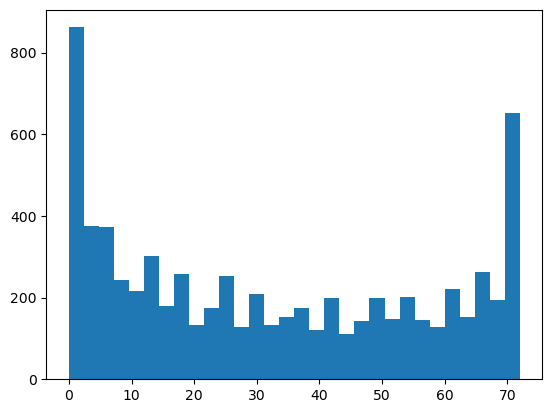

In [11]:
plt.hist(data['Tenure Months'], bins = 30)
plt.show()

In [12]:
data['City'] = data['City'].astype('category')

In [13]:
data.sample(frac=1)
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


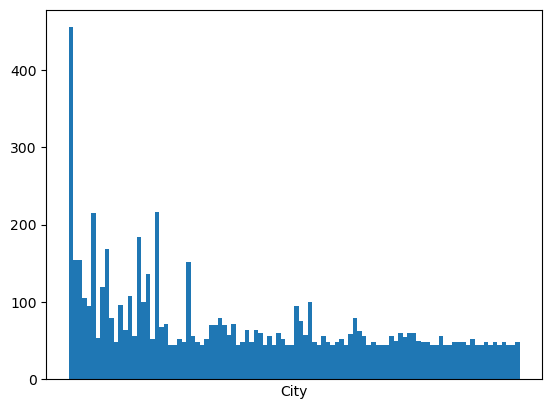

In [14]:
plt.hist(data['City'], bins = 100)
plt.xlabel(xlabel='City')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [15]:
# data['City'].value_counts()

# Normality Assumption

Is not applicable because this is logistic regression

# Constant Variance Assumption


Note: If constant variance assumption does not hold, the vvariance is probably linear

Thus, for logistic regression, constant variance is not a problem since the variance scales in a log manner

Also the mean of multinomial is related to the variance. Hence the assumption is not required

# Useful Columns

In [16]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [17]:
useless_cols = ['CustomerID', 'Count', 'Country', 'State', 'City', \
                'Zip Code', 'Lat Long', 'Churn Score', 'Churn Label', 'CLTV', 'Churn Reason']

In [18]:
# data['Churn Reason'].unique()

In [19]:
len(useless_cols)

11

In [22]:
useful_cols = [i for i in list(data.columns) if i not in useless_cols]
useful_cols

['Latitude',
 'Longitude',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges',
 'Churn Value']

In [21]:
len(useful_cols)

22

In [99]:
# data[useful_cols].dtypes

In [25]:
data[useful_cols].select_dtypes(include=[object])

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges
0,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15
1,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65
2,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5
3,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05
4,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),5036.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),1419.4
7039,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5
7040,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9
7041,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45


In [26]:
useful_object_cols = [col for col in useful_cols if data[col].dtype == object]
# useful_object_cols

In [27]:
data[useful_object_cols]

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges
0,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15
1,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65
2,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5
3,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05
4,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),5036.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),1419.4
7039,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5
7040,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9
7041,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45


In [28]:
# {'column': 'reason'}
problematic_columns = {'Total Charges': 'should be float, but is object'}

In [29]:
data[data['Total Charges'] == ' '][['Tenure Months', 'Monthly Charges', 'Total Charges']]

,Tenure Months,Monthly Charges,Total Charges
2234,0,52.55,
2438,0,20.25,
2568,0,80.85,
2667,0,25.75,
2856,0,56.05,
4331,0,19.85,
4687,0,25.35,
5104,0,20.00,
5719,0,19.70,
6772,0,73.35,


In [30]:
def returnUnique(data, column):
    if len(data[column].unique()) < 10: return data[column].unique()
    return (f'Number of Unique Values: {len(data[column].unique())}', data[column].dtype)

In [31]:
unique_values = {column: returnUnique(data[useful_cols], column) for column in data[useful_cols].columns}

In [32]:
unique_values

{'Latitude': ('Number of Unique Values: 1652', dtype('float64')),
 'Longitude': ('Number of Unique Values: 1651', dtype('float64')),
 'Gender': array(['Male', 'Female'], dtype=object),
 'Senior Citizen': array(['No', 'Yes'], dtype=object),
 'Partner': array(['No', 'Yes'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'Tenure Months': ('Number of Unique Values: 73', dtype('int64')),
 'Phone Service': array(['Yes', 'No'], dtype=object),
 'Multiple Lines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'Internet Service': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'Online Security': array(['Yes', 'No', 'No internet service'], dtype=object),
 'Online Backup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'Device Protection': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Tech Support': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Streaming TV': array(['No', 'Yes', 'No internet service'], dtype=object),
 'St

# Pre-Processing

In [121]:
# data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

In [122]:
# data.loc[data['Total Charges'].isna(), 'Total Charges'] = 0

In [123]:
# data.dtypes

In [124]:
# data[data['Churn Reason'].isna()]['Churn Label'].value_counts()